### FRE-GY 6901, Volatility Models, Master of Science in Financial Engineering, NYU Tandon, Fall 2024
# Computing assignment 1 (part II of Homework week 5)

### Due Date: 11:59 PM Monday, October 14, 2024
You should turn in the notebook on Brightspace.

The computing assignment is about the two-factor Bergomi model.

Please comment your code properly.

Before you turn in the notebook, press the "Run all cells" button in the toolbar, and make sure all the calculation results and graphs are produced correctly in a reasonable time frame, and then save the notebook.

In [1]:
import numpy as np

from scipy.stats import norm
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (4.8, 3.2)

from math import exp, sqrt, log, pi, sin, cos, atan, tan

In [2]:
plt.style.use('ggplot')

In [3]:
# installing the py_vollib library
! pip install py_vollib

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 2.8 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62831 sha256=ca82eb81da663be7d360da9c181869e83febb764435db2d0afeba9146d2276c6
  Stored in directory: /root/.cache/pip/wheels/84/0c/fc/b68506eda40cccaeb0013be550ba904d253ec90eae2b156052
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24451 sha256=699ce67770bef1ad62207c6eca8b2bec372cee057432fcee04f6def12836729f
  Stored in directory: /root/.cache/pip/wheels/32/d9/4f/360d4b0b9ec7c65583ec7c8e72fd2158c97ad04fbcb932891c
Successfully built py_vollib py_lets_be_rational


In [4]:
from py_vollib.black_scholes.implied_volatility import implied_volatility
vec_find_vol_rat = np.vectorize(implied_volatility)   # a better imp vol estimator based on P Jäckel Let's be rational

# The two-factor Bergomi model
The objective of the homework is to price SPX options, VIX futures, and VIX options in the two-factor Bergomi model

\begin{eqnarray}
S_t &=& S_0 \exp\left(\int_0^t \sqrt{\xi_s^s}dW_s - \frac{1}{2}\int_0^t \xi_s^s ds \right) \\
    X_t^j &=& e^{-k_j t} \int_0^t e^{k_j s} \, dZ^j_s, \qquad j\in\{1,2\} \\
\alpha_\theta &=& \left( (1-\theta)^2 +\theta^2+2 \rho_{12}\theta(1-\theta)\right)^{-1/2} \\
x_t^u &=& \alpha_\theta \left((1-\theta)e^{-k_1(u-t)}X_t^1 + \theta e^{-k_2(u-t)}X_t^2 \right) \\
\xi_t^u &=& \xi_0^u g^u(t,x_t^u) \;\; = \;\;\xi_0^u f^u(t,X_t^1,X_t^2) \\
g^u(t,x) &=& \exp\left(\omega x - \frac{\omega^2}{2}\chi(t,u)\right) \\
\chi(t,u) &=& \alpha_\theta^2\left( (1-\theta)^2e^{-2k_1(u-t)} \text{Var}(X_t^1) + \theta^2e^{-2k_2(u-t)} \text{Var}(X_t^2) \right. \\
&& \left. + 2\theta(1-\theta)e^{-(k_1+k_2)(u-t)}\text{Cov}(X_t^1,X_t^2)\right) \\
d\langle W,Z^1\rangle_t &=& \rho_{S1} dt \\
d\langle W,Z^2\rangle_t &=& \rho_{S2} dt \\
d\langle Z^1,Z^2\rangle_t &=& \rho_{12} dt \\
\end{eqnarray}



---



## Pricing SPX options

1. By doing a Cholesky decomposition, give a necessary and sufficient condition (*) on $\rho_{S1},\rho_{S2},\rho_{12}$ so that
$$\begin{bmatrix}1 & \rho_{S1} & \rho_{S2}\\ \rho_{S1} & 1 & \rho_{12} \\ \rho_{S2} & \rho_{12} & 1\end{bmatrix}$$
is a correlation matrix.

**Answer:**

## Cholesky Decomposition and Conditions for a Valid Correlation Matrix

Given the following matrix:

$
\mathbf{R} =
\begin{bmatrix}
1 & \rho_{S1} & \rho_{S2} \\
\rho_{S1} & 1 & \rho_{12} \\
\rho_{S2} & \rho_{12} & 1
\end{bmatrix},
$

our task is to determine a **necessary and sufficient condition** under which $\mathbf{R}$ is a **valid correlation matrix**. This matrix must satisfy the following properties:

### 1. Symmetry
Since $\mathbf{R}$ is a correlation matrix, it must be symmetric:
$\mathbf{R}^\top = \mathbf{R}$.

### 2. Diagonal Elements Equal to 1
For a correlation matrix, the diagonal elements must all be equal to 1:
$
R_{ii} = 1, \quad \forall i \in \{1, 2, 3\}.
$

### 3. Positive Semi-Definiteness
A valid correlation matrix must be **positive semi-definite**, meaning that for any non-zero vector $\mathbf{z} \in \mathbb{R}^3 \$, the quadratic form satisfies:

$\mathbf{z}^\top \mathbf{R} \mathbf{z} \geq 0$

This implies that all **leading principal minors** of $\mathbf{R}$ must have non-negative determinants.

### 4. Determinants of Leading Principal Minors

1. **First-order principal minor**:
   $
   \det\left( 1 \right) = 1 > 0.
   $

2. **Second-order principal minor**:
   $
   \det\left(
   \begin{bmatrix}
   1 & \rho_{S1} \\
   \rho_{S1} & 1
   \end{bmatrix}
   \right) = 1 - \rho_{S1}^2 \geq 0.
   $

   This requires:
   
   $
   |\rho_{S1}| \leq 1.
   $

3. **Third-order principal minor** (determinant of the full matrix):
   $
   \det(\mathbf{R}) = 1 + 2 \rho_{S1} \rho_{S2} \rho_{12} - \rho_{S1}^2 - \rho_{S2}^2 - \rho_{12}^2 \geq 0.
   $

### 5. Constraints on Correlation Coefficients
Each pairwise correlation must lie within the interval $ [-1, 1] $:
$
-1 \leq \rho_{S1}, \rho_{S2}, \rho_{12} \leq 1.
$

### 6. Necessary and Sufficient Condition for Positive Semi-Definiteness
The matrix $\mathbf{R}$ is a valid correlation matrix if and only if the following condition holds:
$
1 + 2 \rho_{S1} \rho_{S2} \rho_{12} - \rho_{S1}^2 - \rho_{S2}^2 - \rho_{12}^2 \geq 0.
$

 as long as each pairwise correlation lieswithin the interval $ [-1, 1] $:
$
-1 \leq \rho_{S1}, \rho_{S2}, \rho_{12} \leq 1.
$

This ensures that $\mathbf{R}$ is positive semi-definite, and thus a valid correlation matrix.




---



Below we describe a Monte Carlo simulation scheme for the two-factor Bergomi
 model.

First we discretize the interval $(0,T)$ into subintervals $(t_{i-1}, t_i)$, $1\leq i\leq n$, and set $\Delta t_i=t_i-t_{i-1}$.

The Ornstein-Uhlenbeck process $X^j$ is explicitly solvable:
\begin{equation}
X^j_{t_i}=e^{-k_j\Delta t_i}X^j_{t_{i-1}}+\int_{t_{i-1}}^{t_i} e^{-k_j\left(t_i-s\right)}dZ_s^{j}.
\end{equation}
so that paths of $X^j$ can be simulated exactly.

To simulate the spot process $S$, we use the Euler scheme on the log (by abuse of notation, below, S will denote the Euler scheme, not the true asset price process):
$$\log S_{t_i}-\log S_{t_{i-1}}=-\frac{1}{2}\xi_{t_{i-1}}^{t_{i-1}}\Delta t_i+\sqrt{\xi_{t_{i-1}}^{t_{i-1}}}\int_{t_{i-1}}^{t_i}dW_t$$

Thus given $(S_{t_{i-1}},X^1_{t_{i-1}},X^2_{t_{i-1}})$, $(\log S_{t_i},X^1_{t_i},X^2_{t_i})$ is a Gaussian vector.

2. Compute the mean vector and covariance matrix of this Gaussian vector.

This is what we will use to iteratively simulate $(\log S_{t_i},X^1_{t_i},X^2_{t_i})$.

3. Fill in the blanks in the code below.




---


The Euler scheme is a numerical method used to approximate solutions of stochastic differential equations (SDEs). For a process $S_t$ driven by an SDE, the scheme discretizes time into steps $t_0, t_1, \ldots, t_n$ with size $ \Delta t$ and approximates the process incrementally as
$S_{t_{i+1}} = S_{t_i} + \mu(S_{t_i}, t_i) \, \Delta t + \sigma(S_{t_i}, t_i) \, \sqrt{\Delta t} \, Z_i $, where $Z_i $ is a standard normal random variable. In this implementation, the Euler scheme is applied to the logarithm of the stock price, \( $\log S_t$ \), which improves numerical stability by dampening large variations and ensuring positive prices, thus avoiding instability issues common in direct simulations of the stock price.




---



---


Mean Vector

The **mean vector** for \((\log S_{t_i}, X^1_{t_i}, X^2_{t_i})\) is:

$$
\mathbb{E}\left[
\begin{pmatrix}
\log S_{t_i} \\
X^1_{t_i} \\
X^2_{t_i}
\end{pmatrix}
\right] =
\begin{pmatrix}
\log S_{t_{i-1}} - \frac{1}{2} \xi_{t_{i-1}}^{t_{i-1}} \Delta t_i \\
e^{-k_1 \Delta t_i} X^1_{t_{i-1}} \\
e^{-k_2 \Delta t_i} X^2_{t_{i-1}}
\end{pmatrix}.
$$



The covariance matrix:

$$
\text{Cov}\left(
\begin{pmatrix}
\log S_{t_i} \\
X^1_{t_i} \\
X^2_{t_i}
\end{pmatrix}
\right) =
\begin{pmatrix}
\xi_{t_{i-1}}^{t_{i-1}} \Delta t_i & \rho_1 \sqrt{\xi_{t_{i-1}}^{t_{i-1}}} \frac{1 - e^{-k_1 \Delta t_i}}{k_1} & \rho_2 \sqrt{\xi_{t_{i-1}}^{t_{i-1}}} \frac{1 - e^{-k_2 \Delta t_i}}{k_2} \\
\rho_1 \sqrt{\xi_{t_{i-1}}^{t_{i-1}}} \frac{1 - e^{-k_1 \Delta t_i}}{k_1} & \frac{1 - e^{-2k_1 \Delta t_i}}{2k_1} & \rho_{12} \frac{1 - e^{-(k_1 + k_2) \Delta t_i}}{k_1 + k_2} \\
\rho_2 \sqrt{\xi_{t_{i-1}}^{t_{i-1}}} \frac{1 - e^{-k_2 \Delta t_i}}{k_2} & \rho_{12} \frac{1 - e^{-(k_1 + k_2) \Delta t_i}}{k_1 + k_2} & \frac{1 - e^{-2k_2 \Delta t_i}}{2k_2}
\end{pmatrix}.
$$


In [5]:
def two_factor_bergomi_mc(vov,k_1,k_2,theta,rho_sx1,rho_sx2,rho_x1x2,xi_0,n_steps,N_sims):
    #xi_0 is assumed costant: just a number
    #vov is the vol of variance omega


    # Define the correlation matrix for z1, z2, z3
    corr_matrix = np.array([
        [1.0, rho_x1x2, rho_sx1],  # Correlation of z1 with itself, z2, z3
        [rho_x1x2, 1.0, rho_sx2],  # Correlation of z2 with z1, itself, z3
        [rho_sx1, rho_sx2, 1.0]   # Correlation of z3 with z1, z2, itself
    ])

    # Cholesky decomposition of the correlation matrix
    L = np.linalg.cholesky(corr_matrix)
    tt = np.linspace(0., T, n_steps + 1)
    dt = T/n_steps

    def covar(k_1,k_2,rho,t):

        return rho*(1-np.exp(-(k_1+k_2)*t))/(k_1+k_2)

    def chi_func(k_1,k_2,theta,rho_x1x2,alpha,t): # computes chi(t,t)
        chi = (1-theta)**2*covar(k_1,k_1,1.0,t)+theta**2*covar(k_2,k_2,1.0,t)+\
        2*theta*(1-theta)*covar(k_1,k_2,rho_x1x2,t)

        return alpha**2*chi

    alpha = 1/sqrt((1-theta)**2+theta**2+2*rho_x1x2*theta*(1-theta))
    chi = chi_func(k_1,k_2,theta,rho_x1x2,alpha,tt)

    X_1 = np.zeros((n_steps+1,N_sims))
    X_2 = np.zeros((n_steps+1,N_sims))
    X = np.zeros((n_steps+1,N_sims))
    inst_vol = np.zeros((n_steps+1,N_sims))
    logS = np.zeros((n_steps+1,N_sims))
    logS[0] = log(S_0)
    inst_vol[0] = sqrt(xi_0)

    for i in range(n_steps):
        # Generate independent standard normal samples
        z1, z2, z3 = L @ np.random.normal(size=(3, N_sims))


        X_1[i+1] = X_1[i]*np.exp(-k_1*dt) + sqrt(covar(k_1,k_1,1,dt))*z1
        X_2[i+1] = X_2[i] * np.exp(-k_2 * dt) + np.sqrt(covar(k_2, k_2, 1, dt)) * z2
        X[i+1] = alpha*((1-theta)*X_1[i+1] + theta*X_2[i+1])
        inst_vol[i+1] = sqrt(xi_0)*np.exp(vov*X[i+1]/2-vov**2/4*chi[i+1])

        logS[i + 1] = logS[i] - 0.5 * inst_vol[i] ** 2 * dt + inst_vol[i] * np.sqrt(dt) * z3

    return np.exp(logS[-1])

In [6]:
# These functions check the validity
# Function to check if a matrix is symmetric
def is_symmetric(matrix, tol=1e-8):
    return np.allclose(matrix, matrix.T, atol=tol)

# Function to check if a matrix is positive semidefinite
def is_positive_semidefinite(matrix, tol=1e-8):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.all(eigenvalues >= -tol)  # Allow for small numerical errors

# Function to check if the matrix is valid for Cholesky
def check_cholesky_validity(matrix):
    if not is_symmetric(matrix):
        raise ValueError("The covariance matrix is not symmetric.")
    if not is_positive_semidefinite(matrix):
        raise ValueError("The covariance matrix is not positive semidefinite.")
    # print("Covariance matrix is valid for Cholesky decomposition.")


In [7]:
# parameters
vov = 4
k_1 = 20
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx1,rho_sx2,rho_x1x2 = -0.8, -0.7, 0.7
T = 1

In [8]:
S_0 = 100

In [9]:
n_steps = 500
N_sims = 100000

In [10]:
ST = two_factor_bergomi_mc(vov,k_1,k_2,theta,rho_sx1, rho_sx2, rho_x1x2,xi_0,n_steps,N_sims)

In [11]:
lm = np.linspace(-0.6,0.4,100) # log-moneyness
strike_array = np.exp(lm)*S_0

In [12]:
opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
iv = vec_find_vol_rat(opt_price, S_0, strike_array, T, 0, 'c')

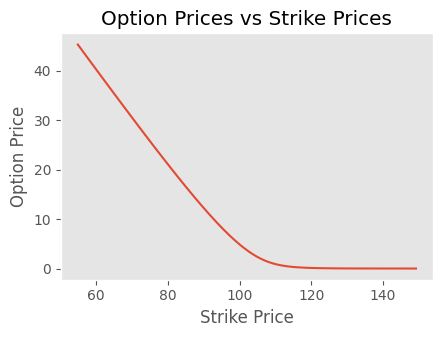

In [13]:
plt.plot(strike_array, opt_price)
plt.grid()
plt.title('Option Prices vs Strike Prices')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.show()

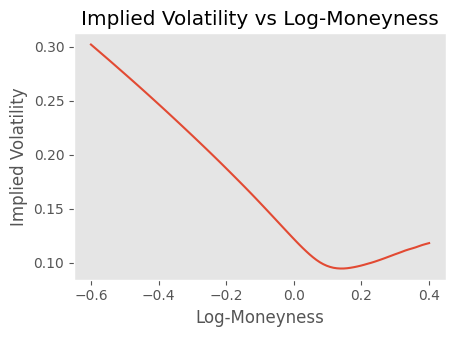

In [14]:
plt.plot(lm, iv)
plt.grid()
plt.title('Implied Volatility vs Log-Moneyness')
plt.xlabel('Log-Moneyness')
plt.ylabel('Implied Volatility')
plt.show()

4. Vary the parameters vov, k_1, k_2, theta, rho_sx1, rho_sx2, rho_x1x2 and T and comment on the impact on the smile

# Varying the parameters:


In [15]:
def bergomi_2f_part2(vov,k_1,k_2,theta,rho_sx1, rho_sx2, rho_x1x2,xi_0,n_steps=500,N_sims=100000,S_0=100,T=1):
    ST = two_factor_bergomi_mc(vov,k_1,k_2,theta,rho_sx1, rho_sx2, rho_x1x2,xi_0,n_steps,N_sims)

    lm = np.linspace(-0.6,0.4,100) # log-moneyness
    strike_array = np.exp(lm)*S_0

    opt_price = np.average(np.maximum(ST-strike_array.reshape(-1,1),0),axis=1)
    iv = vec_find_vol_rat(opt_price, S_0, strike_array, T, 0, 'c')

    return lm, iv

Varying vov

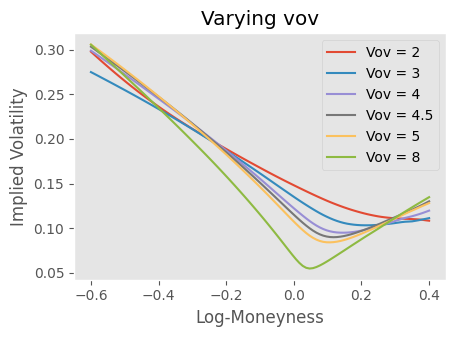

In [17]:
k_1 = 20
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx1,rho_sx2,rho_x1x2 = -0.8, -0.7, 0.7
T = 1

for i, vov in enumerate([2, 3, 4, 4.5, 5, 8]):
    lm, iv = bergomi_2f_part2(vov,k_1,k_2,theta,rho_sx1,rho_sx2,rho_x1x2,xi_0)

    plt.plot(lm,iv, label='Vov = ' + str(vov))

plt.title('Varying vov')
plt.xlabel('Log-Moneyness')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()

Key takeaways are:

As vov increases, the smile becomes significantly steeper.

Lower vov values (e.g., vov = 2) produce a flatter volatility smile. This implies less pronounced skewness and less sensitivity to volatility changes across different strikes.

For high vov values (e.g., vov = 8), the curvature of the implied volatility smile is more pronounced. This reflects the model’s increased convexity due to the stochastic nature of volatility when vov is large.

In summary, increasing vov introduces more volatility skew, while lower vov values result in a flatter implied volatility surface.

Varying k1

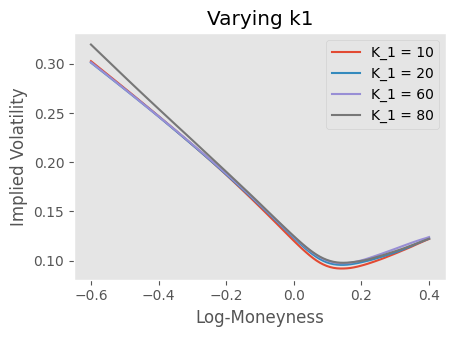

In [18]:
vov = 4
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx1,rho_sx2,rho_x1x2 = -0.8, -0.7, 0.7
T = 1

for i, k_1 in enumerate([10,20,60,80]):
    lm, iv = bergomi_2f_part2(vov,k_1,k_2,theta,rho_sx1,rho_sx2,rho_x1x2,xi_0)

    plt.plot(lm,iv, label='K_1 = ' + str(k_1))

plt.title('Varying k1')
plt.xlabel('Log-Moneyness')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()

All curves are relatively close to each other, particularly around the at-the-money (ATM) region, implying that the mean reversion rate k1
has less impact on ATM volatility compared to the wings (deep in/out of the money).

The wings show minor divergence for higher k1 values, suggesting that the volatility smile steepens slightly as the mean reversion becomes stronger, with volatility shocks dissipating more quickly.

Varying k2

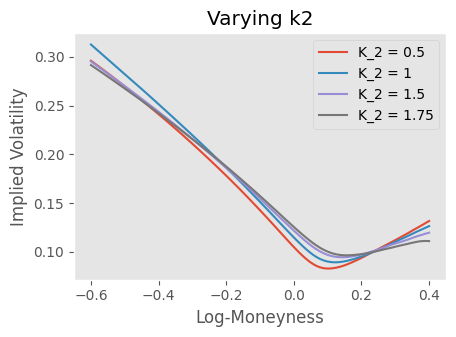

In [19]:
vov = 4
k_1 = 20
theta = 0.75
xi_0 = 0.025
rho_sx1,rho_sx2,rho_x1x2 = -0.8, -0.7, 0.7
T = 1

for i, k_2 in enumerate([0.5,1,1.5,1.75]):
    lm, iv = bergomi_2f_part2(vov,k_1,k_2,theta,rho_sx1,rho_sx2,rho_x1x2,xi_0)

    plt.plot(lm,iv, label='K_2 = ' + str(k_2))

plt.title('Varying k2')
plt.xlabel('Log-Moneyness')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()

As k2 increases, the implied volatility smile flattens, particularly in the wings, but the overall effect of the parameter isn't as pronounced as the other factors.

> Add blockquote



Varying theta, the blending factor

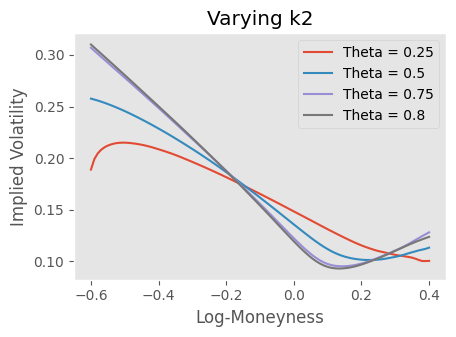

In [20]:
vov = 4
k_1 = 20
k_2 = 1.5
# theta = 0.75
xi_0 = 0.025
rho_sx1,rho_sx2,rho_x1x2 = -0.8, -0.7, 0.7
T = 1

for i, theta in enumerate([0.25,0.5,0.75,0.8]):
    lm, iv = bergomi_2f_part2(vov,k_1,k_2,theta,rho_sx1,rho_sx2,rho_x1x2,xi_0)

    plt.plot(lm,iv, label='Theta = ' + str(theta))

plt.title('Varying k2')
plt.xlabel('Log-Moneyness')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()

As $ \theta $ increases (from 0.25 to 0.8), the implied volatility smile becomes steeper and more well-fit, especially in the wings (both in-the-money and out-of-the-money). Higher values of $ \theta $ indicate a stronger contribution from the second process, which leads to more well-fit skews.

For lower values of $ \theta $ (e.g., $ \theta = 0.25 $), the implied volatility curve is flatter and shows less curvature in the wings, implying that the first process dominates and there is less contribution from the second process, resulting in a smoother volatility profile.

The wings exhibit significant changes as $ \theta $ increases. This indicates that the blending factor affects the volatility smile mostly away from the ATM region, but the ATM region values are also significantly disparate from each other.

For larger values of $ \theta $ (e.g., $ \theta = 0.75 $ and $ \theta = 0.8 $), there is more well-fit curvature and a sharper increase in implied volatility for deep out-of-the-money options, suggesting greater influence from the second process as $ \theta $ grows.

Higher values of $ \theta $ appear to fit observed market data more accurately, as the curves for $ \theta = 0.75 $ and $ \theta = 0.8 $ show better alignment with the overall behavior of the implied volatility smile.

Varying rho_sx1

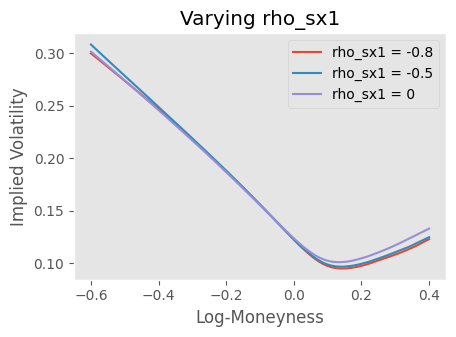

In [21]:
# For the correlation matrix to be valid rho_sx1 has to be between -1 and 0.02

vov = 4
k_1 = 20
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx2,rho_x1x2 = -0.7, 0.7
T = 1

for i, rho_sx1 in enumerate([-0.8,-0.5,0]):
    lm, iv = bergomi_2f_part2(vov,k_1,k_2,theta,rho_sx1,rho_sx2,rho_x1x2,xi_0)

    plt.plot(lm,iv, label='rho_sx1 = ' + str(rho_sx1))

plt.title('Varying rho_sx1')
plt.xlabel('Log-Moneyness')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()

The differences in the surves are minimal for changing rho_sx1. Other parameters seem to affect the fit more.

Varying rho_sx2

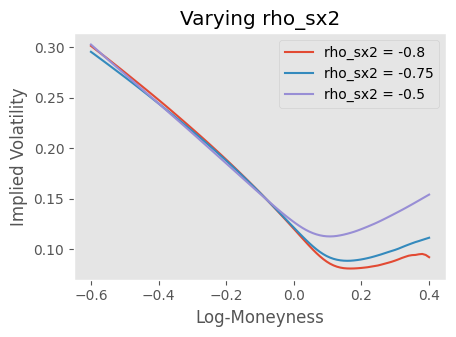

In [22]:
# For the correlation matrix to be valid rho_sx2 has to be between -0.99 and -0.13

vov = 4
k_1 = 20
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx1,rho_x1x2 = -0.8, 0.7
T = 1

for i, rho_sx2 in enumerate([-0.8,-0.75,-0.5]):
    lm, iv = bergomi_2f_part2(vov,k_1,k_2,theta,rho_sx1,rho_sx2,rho_x1x2,xi_0)

    plt.plot(lm,iv, label='rho_sx2 = ' + str(rho_sx2))

plt.title('Varying rho_sx2')
plt.xlabel('Log-Moneyness')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()

As rho_sx2 becomes more negative (from -0.5 to -0.8), the implied volatility curve steepens, particularly in the wings. A stronger negative correlation between the underlying and process 2 decreases the curvature of the volatility smile, especially for out-of-the-money options.

We see that weaker correlations reduce the skew steepness.

Varying rho_x1x2

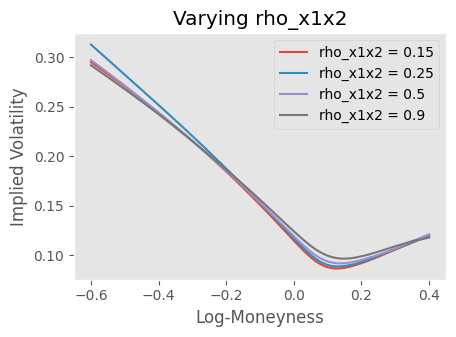

In [23]:
# Rho_x1x2 has to be between 0.132 and 0.988 (from our previous work for corr matrix validity)

vov = 4
k_1 = 20
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx1,rho_sx2 = -0.8, -0.7
T = 1

for i, rho_x1x2 in enumerate([0.15,0.25,0.5,0.9]):
    lm, iv = bergomi_2f_part2(vov,k_1,k_2,theta,rho_sx1,rho_sx2,rho_x1x2,xi_0)

    plt.plot(lm,iv, label='rho_x1x2 = ' + str(rho_x1x2))

plt.title('Varying rho_x1x2')
plt.xlabel('Log-Moneyness')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()

As rho_x1x2 increases, the implied volatility smile becomes slightly flatter, particularly in the wings.

Varying T

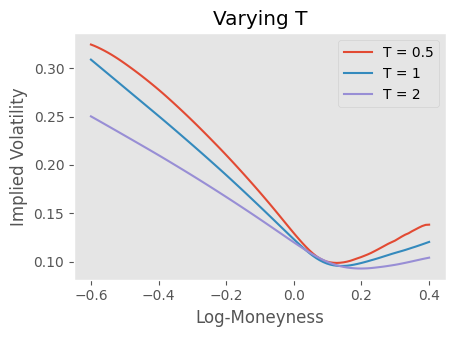

In [24]:
vov = 4
k_1 = 20
k_2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx1,rho_sx2,rho_x1x2 = -0.8, -0.7, 0.7
# T = 1

for i, T in enumerate([0.5, 1, 2]):
    lm, iv = bergomi_2f_part2(vov,k_1,k_2,theta,rho_sx1,rho_sx2,rho_x1x2,xi_0,T=T)

    plt.plot(lm,iv, label='T = ' + str(T))

plt.title('Varying T')
plt.xlabel('Log-Moneyness')
plt.ylabel('Implied Volatility')
plt.grid()
plt.legend()
plt.show()

As time to maturity (T) increases, the implied volatility smile flattens. For shorter maturities (e.g., T = 0.5), the volatility smile is much steeper, particularly in the wings. This indicates higher implied volatility for shorter-dated options, especially for deep in-the-money and out-of-the-money strikes. As T increases (e.g., T = 2), the smile becomes flatter, reflecting lower volatility for longer-dated options and less pronounced skewness.



# Pricing VIX options

Recall that in variance curve models,
$$\text{VIX}^2_T = \frac{1}{\tau}\int_T^{T+\tau} \xi_T^u du$$
where $\tau=30/365$ (30 days). As a result, in the two-factor Bergomi model, there exists a function $\psi$ such that
$$\text{VIX}_T = \psi(T,X_T^1,X_T^2)$$

5. Write down the function $\psi$.

Since the vector $(X_T^1,X_T^2)$ is Gaussian, the price $\mathbb{E}[h(\text{VIX}_T)]$ of a VIX option $h(\text{VIX}_T)$ can very efficiently be estimated by a Gauss-Hermite quadrature; see
https://en.wikipedia.org/wiki/Gaussian_quadrature and
https://numpy.org/doc/stable/reference/generated/numpy.polynomial.hermite.hermgauss.html

6. Using this method, price a VIX future maturing at $T$ (choose $T=1/12$ (1 month), $2/12$, $3/12$, $4/12$) and VIX call options with the same maturity; take strikes with log-moneyness from -0.2 to 2.5, based on the price of the VIX future. Vary the number of points in the quadrature. Plot the VIX smile, using the Black formula (with spot value the value of the VIX future) to compute the VIX implied volatilities. Comment on the impact of the vol-of-vol on the price of the VIX future and on the VIX implied volatilities; in the one-factor Bergomi model ($\theta=0$), comment on the impact of the mean reversion on the VIX implied volatilities.



---



---
The function is:
$$ \psi(T, X^1_T, X^2_T) = \sqrt{\frac{\xi_0}{\tau}\int_T^{T+\tau} exp(\omega\alpha_0((1-\theta)e^{-k_1(u-T)}X^1_T+\theta e^{-k2(u-T)}X^2_T)-\frac{\omega^2}{2}\chi(T,u))} $$


#### Gaussian Quadrature for $ \mathbb{E}[\text{VIX}_T] $


Firstly, $ (X_T^1, X_T^2) $ need to be written tin terms of independent normal random variables.  We do this as:

$$
\begin{pmatrix}
X_T^1 \\
X_T^2
\end{pmatrix}
=
L \cdot
\begin{pmatrix}
Z_1 \\
Z_2
\end{pmatrix},
$$

where $ L $ is the Cholesky matrix:

$$
L =
\begin{pmatrix}
1 & 0 \\
\rho_{12} & \sqrt{1 - \rho_{12}^2}
\end{pmatrix}.
$$  

---

We use the quadrature to approximate the following:
$$
\mathbb{E}[\text{VIX}_T] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \psi(T, X_T^1, X_T^2) \, f_X(X_T^1, X_T^2) \, dX_T^1 \, dX_T^2.
$$


Next, we scale both $X_T^1$ and $X_T^2$ by the standard deviations of their respective Ornstein-Uhlenbeck (OU) processes to ensure that the random variables follow the appropriate distribution.

The Gauss-Hermite quadrature is then employed to approximate the expectation as follows:

$$
\mathbb{E}[\text{VIX}_T] \approx \frac{1}{\pi} \sum_{i=1}^{N} \sum_{j=1}^{N} w_i w_j \, \psi \left( T, (L \cdot \mathbf{Z}_{ij})_1, (L \cdot \mathbf{Z}_{ij})_2 \right),
$$

where $\mathbf{Z}_{ij} = (\sqrt{2} x_i, \sqrt{2} x_j)$, and $x_i$ and $w_i$ denote the Gauss-Hermite quadrature nodes and corresponding weights, respectively. The factor $\frac{1}{\pi}$ accounts for the rescaling of the Gaussian density.



In [25]:
from numpy.polynomial.hermite import hermgauss
from py_vollib.black import black
from scipy.linalg import cholesky
from scipy.optimize import brentq

In [26]:
# we use the Gauss Hermite method to evaluate the two layers of exponential integrals.
# first we write the supporting functions that are relevant to our equation

def covar(rho, k1, k2, t):
  return rho*(1-np.exp(-(k1+k2)*t))/(k1+k2)

In [27]:
def chi_func(T, u, k1, k2, theta, rho12, alpha):
    var_X1 = (1 - np.exp(-2 * k1 * T)) / (2 * k1)
    var_X2 = (1 - np.exp(-2 * k2 * T)) / (2 * k2)
    cov_X1X2 = rho12 * (1 - np.exp(-(k1 + k2) * T)) / (k1 + k2)
    t1 = (1 - theta)**2 * var_X1 * np.exp(-2 * k1 * (u - T))
    t2 = theta**2 * var_X2 * np.exp(-2 * k2 * (u - T))
    t3 = 2 * theta * (1 - theta) * cov_X1X2 * np.exp(-(k1 + k2) * (u - T))
    chi = alpha **2 * (t1 + t2 + t3)
    return chi

In [28]:
def psi(T, X_T1, X_T2, omega, k1, k2, theta, rho12, xi_0, tau, alpha):
    u_values = np.linspace(T, T + tau, 50)
    exp_k1 = np.exp(-k1 * (u_values - T))
    exp_k2 = np.exp(-k2 * (u_values - T))
    x_Tu = alpha * ((1 - theta) * X_T1 * exp_k1 + theta * X_T2 * exp_k2)
    chi_Tu = chi_func(T, u_values, k1, k2, theta, rho12, alpha)
    exponent = omega * x_Tu - 0.5 * omega**2 * chi_Tu
    integrand = xi_0 * np.exp(exponent)
    integral = np.trapz(integrand, u_values)
    VIX_T_squared = (1 / tau) * integral
    VIX_T = np.sqrt(VIX_T_squared)
    return VIX_T

In [29]:
def price_vix_ftr(T, omega, k1, k2, theta, rho12, xi_0, tau, N):
  alpha = 1 / np.sqrt((1 - theta)**2 + theta**2 + 2 * rho12 * theta * (1 - theta))

  # Covariance matrix
  var_X1 = (1 - np.exp(-2 * k1 * T)) / (2 * k1)
  var_X2 = (1 - np.exp(-2 * k2 * T)) / (2 * k2)
  cov_X1X2 = rho12 * (1 - np.exp(-(k1 + k2) * T)) / (k1 + k2)

  Sigma = np.array([[var_X1, cov_X1X2],
                    [cov_X1X2, var_X2]])

  # Check if the covariance matrix is valid for Cholesky decomposition
  check_cholesky_validity(Sigma)

  # Applying Cholesky to the matrix
  L = cholesky(Sigma, lower=True)

  # Defining the Gauss-Hermite parameters and initialising them
  nodes, weights = hermgauss(N)
  nodes = nodes / np.sqrt(2)
  weights = weights / np.sqrt(np.pi)

  expVIX = 0.0
  for i in range(N):
      for j in range(N):
          z = np.array([nodes[i], nodes[j]])
          X_T = L @ (np.sqrt(2) * z)


          weight = weights[i] * weights[j]
          VIX_T = psi(T, X_T[0], X_T[1], omega, k1, k2, theta, rho12, xi_0, tau, alpha)


          expVIX += weight * VIX_T

  expVIX /= np.pi
  return expVIX


In [30]:
def price_VIX_option(K, T, omega, k1, k2, theta, rho12, xi_0, tau, N):
    alpha_theta = 1 / np.sqrt((1 - theta)**2 + theta**2 + 2 * rho12 * theta * (1 - theta))

    nodes, weights = hermgauss(N)

    nodes = nodes / np.sqrt(2)
    weights = weights / np.sqrt(np.pi)

    # Covariance matrix
    var_X1 = (1 - np.exp(-2 * k1 * T)) / (2 * k1)
    var_X2 = (1 - np.exp(-2 * k2 * T)) / (2 * k2)
    cov_X1X2 = rho12 * (1 - np.exp(-(k1 + k2) * T)) / (k1 + k2)
    Sigma = np.array([[var_X1, cov_X1X2],
                      [cov_X1X2, var_X2]])

    # Check if the covariance matrix is valid for Cholesky decomposition
    check_cholesky_validity(Sigma)

    # Applying Cholesky to the matrix
    L = cholesky(Sigma, lower=True)

    expected_payoff = 0.0
    for i in range(N):
        for j in range(N):
            z = np.array([nodes[i], nodes[j]])
            weight = weights[i] * weights[j]
            X_T = L @ (np.sqrt(2) * z)
            VIX_T = psi(T, X_T[0], X_T[1], omega, k1, k2, theta, rho12, xi_0, tau, alpha_theta)
            payoff = max(VIX_T - K, 0)
            expected_payoff += weight * payoff
    expected_payoff /= np.pi
    return expected_payoff

In [31]:
omega = 4
k1 = 20
k2 = 1.5
theta = 0.75
xi_0 = 0.025
rho_sx1,rho_sx2,rho12 = -0.8, -0.7, 0.7
T_values = [1/12, 2/12, 3/12, 4/12]
tau = 30/365
N_values = [10, 15, 20, 25]

Maturity T=0.08 years, VIX Future Price: 0.0437
Maturity T=0.17 years, VIX Future Price: 0.0396
Maturity T=0.25 years, VIX Future Price: 0.0367
Maturity T=0.33 years, VIX Future Price: 0.0346
Maturity T=0.08 years, VIX Future Price: 0.0437
Maturity T=0.17 years, VIX Future Price: 0.0396
Maturity T=0.25 years, VIX Future Price: 0.0367
Maturity T=0.33 years, VIX Future Price: 0.0346
Maturity T=0.08 years, VIX Future Price: 0.0437
Maturity T=0.17 years, VIX Future Price: 0.0396
Maturity T=0.25 years, VIX Future Price: 0.0367
Maturity T=0.33 years, VIX Future Price: 0.0346
Maturity T=0.08 years, VIX Future Price: 0.0437
Maturity T=0.17 years, VIX Future Price: 0.0396
Maturity T=0.25 years, VIX Future Price: 0.0367
Maturity T=0.33 years, VIX Future Price: 0.0346


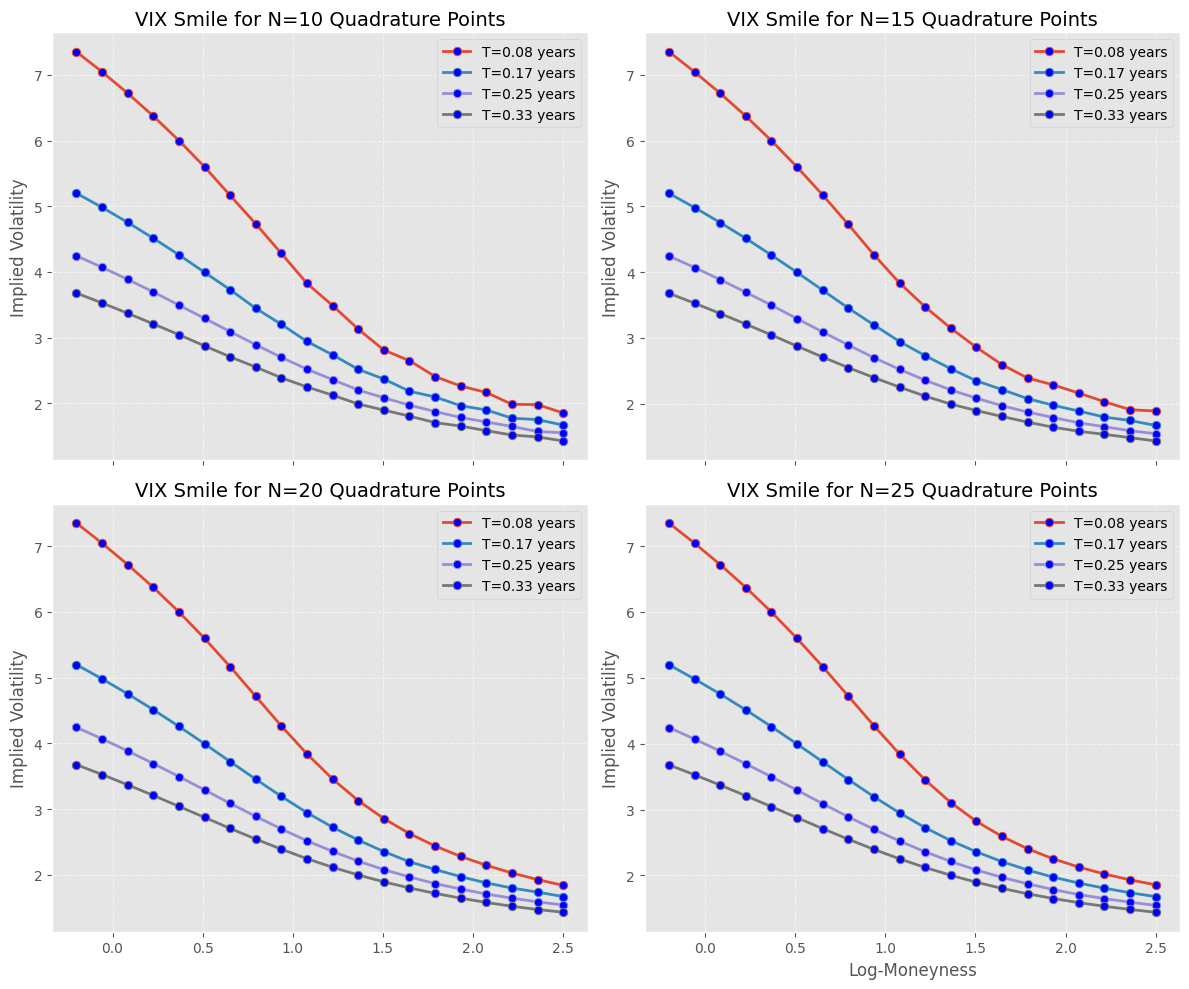

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 4 N_values for the 2x2 structure
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True)  # 2x2 structure

# Flatten the axs array for easier indexing
axs = axs.flatten()

for idx, N in enumerate(N_values):
    ax = axs[idx]  # Get the current subplot axis
    ax.set_title(f"VIX Smile for N={N} Quadrature Points", fontsize=14)  # Set title for each subplot

    for T in T_values:
        F_VIX = price_vix_ftr(T, omega, k1, k2, theta, rho12, xi_0, tau, N)
        print(f"Maturity T={T:.2f} years, VIX Future Price: {F_VIX:.4f}")

        log_moneyness = np.linspace(-0.2, 2.5, 20)
        strikes = F_VIX * np.exp(log_moneyness)

        option_prices = []
        implied_vols = []

        for K in strikes:
            option_price = price_VIX_option(K, T, omega, k1, k2, theta, rho12, xi_0, tau, N)
            option_prices.append(option_price)

            iv = implied_volatility(option_price, F_VIX, K, T, 0, 'c')
            implied_vols.append(iv)

        # Cleaner plot style: consistent lines, professional look
        ax.plot(log_moneyness, implied_vols, marker='o', linestyle='-',
                 markersize=6, markerfacecolor='blue', markeredgewidth=0.75,
                 label=f"T={T:.2f} years", linewidth=2)

    # Labels and title for clarity, using slightly larger fonts
    ax.set_ylabel("Implied Volatility", fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.75, alpha=0.6)  # Add gridlines

    # Add legend to each subplot
    ax.legend(frameon=True, fontsize=10, loc='upper right')

# Shared X-axis label for all subplots
plt.xlabel("Log-Moneyness", fontsize=12)

# Tighter layout to ensure labels do not overlap and subplots fit well
plt.tight_layout()

# Display the plot
plt.show()


Impact of Number of Quadrature Points N

- As the number of quadrature points N increases from 10 to 25, the VIX smile becomes more refined and smoother. This indicates that a higher number of quadrature points improves the accuracy of the numerical integration. The overall shape of the smile remains consistent across different N, with only small changes in implied volatilities. For lower N (e.g., 10 points), the smile may appear slightly more jagged or less smooth, especially for short maturities. Increasing N to 25 or beyond yields more stable and consistent results, suggesting that the number of points chosen for Gaussian quadrature significantly affects the precision of the estimated implied volatilities.

Effect of Maturity T
- For shorter maturities (e.g., T = 0.08 years), the VIX smile is much steeper, especially for deep out-of-the-money options (higher log-moneyness values). As the maturity increases (e.g., T = 0.33 years), the implied volatility curve flattens. This indicates lower volatility for longer-dated options and a less pronounced skew. The VIX smile remains downward sloping across all maturities, with implied volatilities decreasing as log-moneyness increases. The maturity T is referred from the equations above, as the variance of the processes X1 and X2 decay exponentially over time due to their mean reversion properties, which is reflected in the flattening of the VIX smile at longer maturities.


Conclusion

Increasing the number of quadrature points provides better accuracy and smoothness in the VIX smile curves.



In [33]:
vov_values = [2, 4, 6, 8]

Maturity T=0.08 years, VIX Future Price: 0.0486
Maturity T=0.17 years, VIX Future Price: 0.0474
Maturity T=0.25 years, VIX Future Price: 0.0465
Maturity T=0.33 years, VIX Future Price: 0.0458
Maturity T=0.08 years, VIX Future Price: 0.0437
Maturity T=0.17 years, VIX Future Price: 0.0396
Maturity T=0.25 years, VIX Future Price: 0.0367
Maturity T=0.33 years, VIX Future Price: 0.0346
Maturity T=0.08 years, VIX Future Price: 0.0367
Maturity T=0.17 years, VIX Future Price: 0.0294
Maturity T=0.25 years, VIX Future Price: 0.0248
Maturity T=0.33 years, VIX Future Price: 0.0218
Maturity T=0.08 years, VIX Future Price: 0.0287
Maturity T=0.17 years, VIX Future Price: 0.0194
Maturity T=0.25 years, VIX Future Price: 0.0144
Maturity T=0.33 years, VIX Future Price: 0.0114


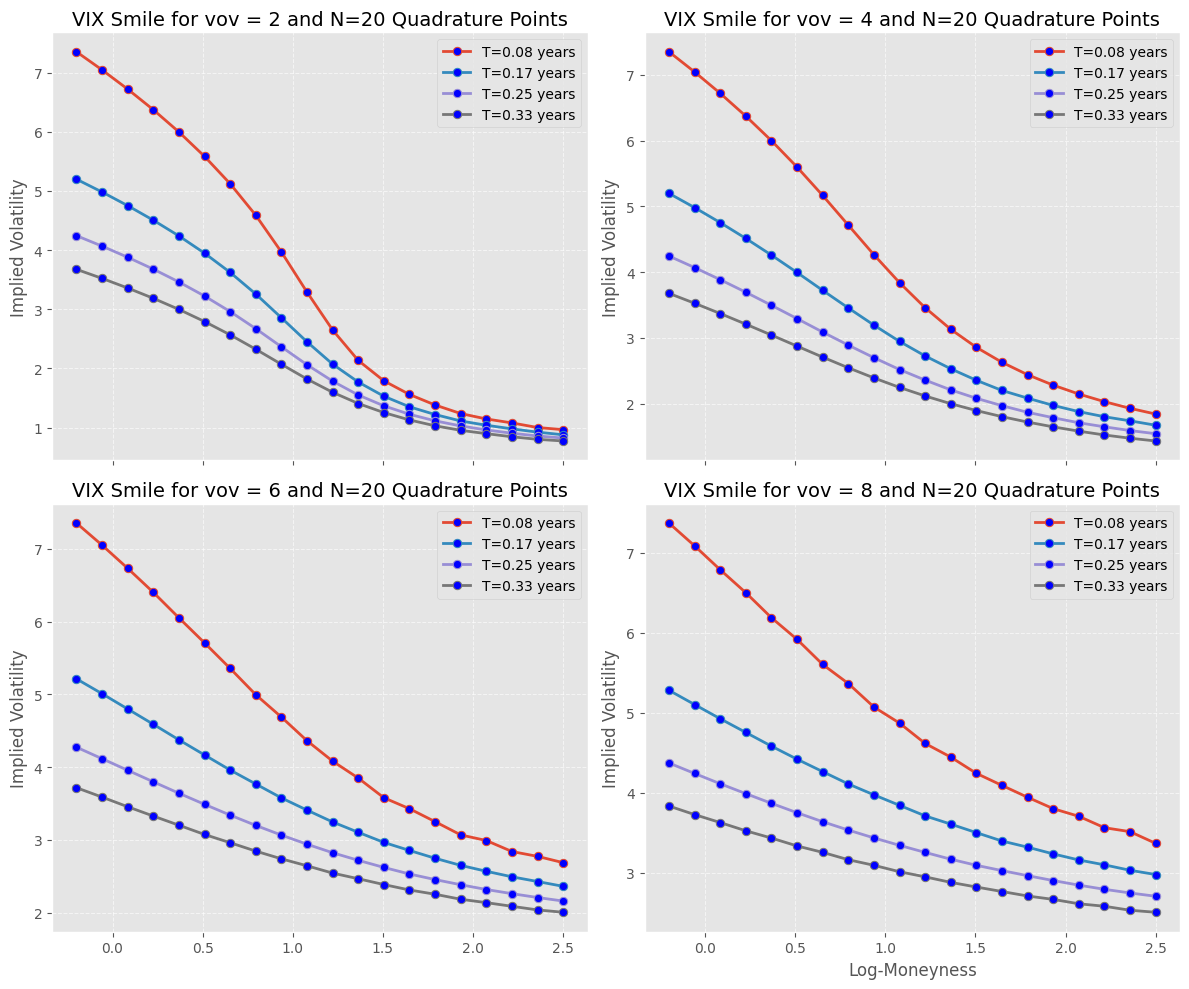

In [34]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True)  # 2x2 structure

# Flatten the axs array for easier indexing
axs = axs.flatten()

for idx, vov in enumerate(vov_values):
    N = 20
    ax = axs[idx]  # Get the current subplot axis
    ax.set_title(f"VIX Smile for vov = {vov} and N={N} Quadrature Points", fontsize=14)  # Set title for each subplot

    for T in T_values:
        F_VIX = price_vix_ftr(T, vov, k1, k2, theta, rho12, xi_0, tau, N)
        print(f"Maturity T={T:.2f} years, VIX Future Price: {F_VIX:.4f}")

        log_moneyness = np.linspace(-0.2, 2.5, 20)
        strikes = F_VIX * np.exp(log_moneyness)

        option_prices = []
        implied_vols = []

        for K in strikes:
            option_price = price_VIX_option(K, T, vov, k1, k2, theta, rho12, xi_0, tau, N)
            option_prices.append(option_price)

            iv = implied_volatility(option_price, F_VIX, K, T, 0, 'c')
            implied_vols.append(iv)

        # Cleaner plot style: consistent lines, professional look
        ax.plot(log_moneyness, implied_vols, marker='o', linestyle='-',
                markersize=6, markerfacecolor='blue', markeredgewidth=0.75,
                label=f"T={T:.2f} years", linewidth=2)

    # Labels and title for clarity, using slightly larger fonts
    ax.set_ylabel("Implied Volatility", fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.75, alpha=0.6)  # Add gridlines

    # Add legend to each subplot
    ax.legend(frameon=True, fontsize=10, loc='upper right')

# Shared X-axis label for all subplots
plt.xlabel("Log-Moneyness", fontsize=12)

# Tighter layout to ensure labels do not overlap and subplots fit well
plt.tight_layout()

# Display the plot
plt.show()


**Effect of Volatility of Volatility (vov) on VIX Future Prices**

Comparing VIX future prices for the same maturity across different vov levels:



Effect of vov on VIX Smile

As vov increases, the VIX smile slightly flattens, particularly for short-dated options (T = 0.08 years). The flatter smiles are observed for higher vov values, especially for deep out-of-the-money options, where implied volatilities are much higher.

For longer maturities (e.g., T = 0.33 years), the smiles are generally flatter, but the impact of increasing vov is still noticeable, with higher vov producing smoother and attenuated curves.

Conclusion

Increasing the volatility of volatility (vov) lowers VIX future prices across all maturities. This is due to the greater uncertainty associated with larger vol-of-vol, which drives down the expected future level of the VIX.

The VIX implied volatility smile becomes flatter as vov increases, particularly for short-dated options. Higher vol-of-vol leads to higher implied volatilities for deep out-of-the-money options, especially for shorter maturities.

In [35]:
theta_values = [0, 0.5, 0.75, 0.8]

Maturity T=0.08 years, VIX Future Price: 0.0494
Maturity T=0.17 years, VIX Future Price: 0.0493
Maturity T=0.25 years, VIX Future Price: 0.0493
Maturity T=0.33 years, VIX Future Price: 0.0493
Maturity T=0.08 years, VIX Future Price: 0.0462
Maturity T=0.17 years, VIX Future Price: 0.0440
Maturity T=0.25 years, VIX Future Price: 0.0425
Maturity T=0.33 years, VIX Future Price: 0.0413
Maturity T=0.08 years, VIX Future Price: 0.0437
Maturity T=0.17 years, VIX Future Price: 0.0396
Maturity T=0.25 years, VIX Future Price: 0.0367
Maturity T=0.33 years, VIX Future Price: 0.0346
Maturity T=0.08 years, VIX Future Price: 0.0432
Maturity T=0.17 years, VIX Future Price: 0.0387
Maturity T=0.25 years, VIX Future Price: 0.0356
Maturity T=0.33 years, VIX Future Price: 0.0333


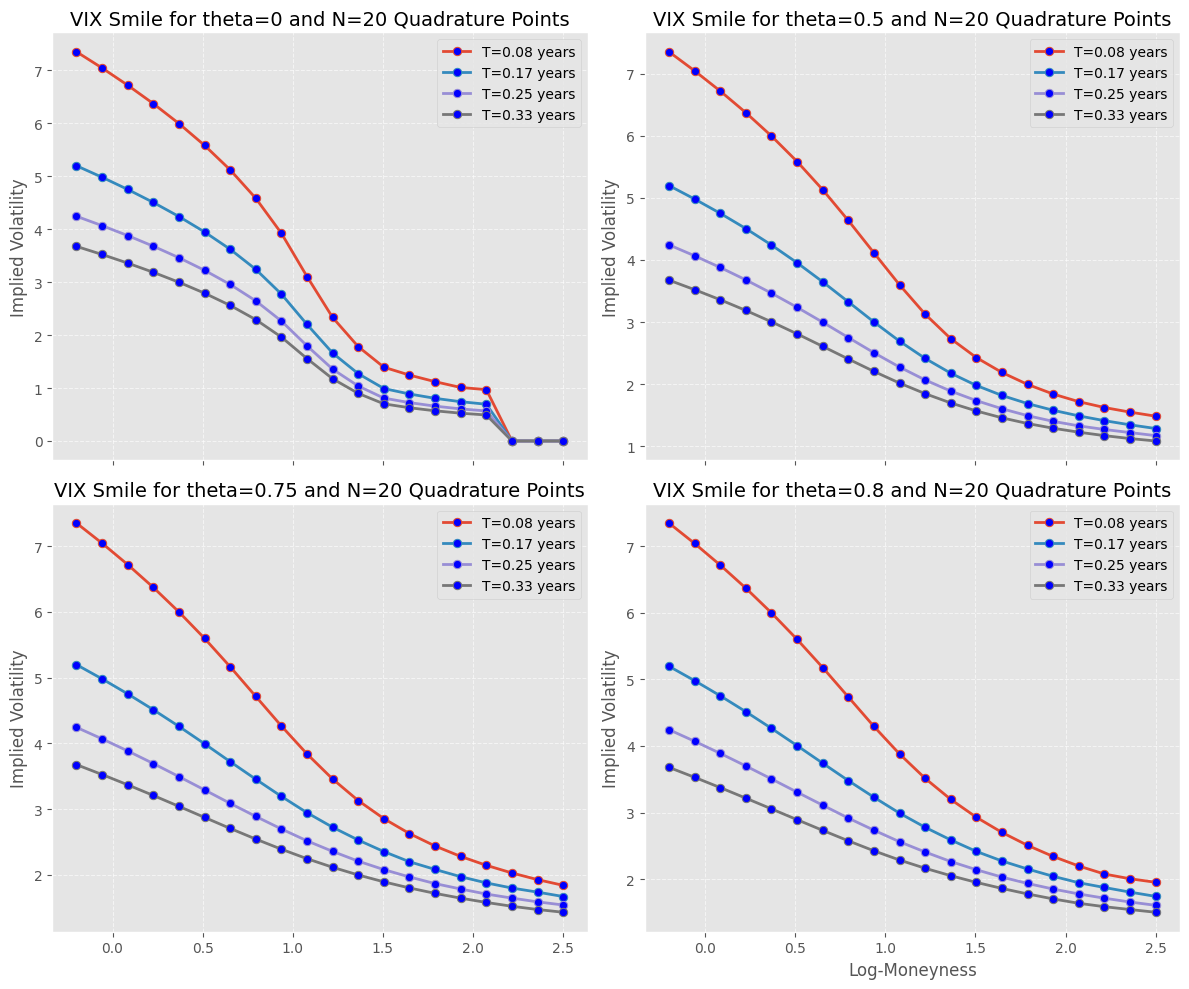

In [36]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True)  # 2x2 structure

# Flatten the axs array for easier indexing
axs = axs.flatten()

for idx, theta in enumerate(theta_values):
    N = 20
    ax = axs[idx]  # Get the current subplot axis
    ax.set_title(f"VIX Smile for theta={theta} and N={N} Quadrature Points", fontsize=14)  # Set title for each subplot

    for T in T_values:
        F_VIX = price_vix_ftr(T, omega, k1, k2, theta, rho12, xi_0, tau, N)
        print(f"Maturity T={T:.2f} years, VIX Future Price: {F_VIX:.4f}")

        log_moneyness = np.linspace(-0.2, 2.5, 20)
        strikes = F_VIX * np.exp(log_moneyness)

        option_prices = []
        implied_vols = []

        for K in strikes:
            option_price = price_VIX_option(K, T, omega, k1, k2, theta, rho12, xi_0, tau, N)
            option_prices.append(option_price)

            iv = implied_volatility(option_price, F_VIX, K, T, 0, 'c')
            implied_vols.append(iv)

        # Cleaner plot style: consistent lines, professional look
        ax.plot(log_moneyness, implied_vols, marker='o', linestyle='-',
                markersize=6, markerfacecolor='blue', markeredgewidth=0.75,
                label=f"T={T:.2f} years", linewidth=2)

    # Labels and title for clarity, using slightly larger fonts
    ax.set_ylabel("Implied Volatility", fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.75, alpha=0.6)  # Add gridlines

    # Add legend to each subplot
    ax.legend(frameon=True, fontsize=10, loc='upper right')

# Shared X-axis label for all subplots
plt.xlabel("Log-Moneyness", fontsize=12)

# Tighter layout to ensure labels do not overlap and subplots fit well
plt.tight_layout()

# Display the plot
plt.show()


**Effect of Blending Factor $ \theta $ on VIX Smile**

The plot for $ \theta = 0 $ (top-left) corresponds to the one-factor Bergomi (1F-Bergomi) model, where only the first stochastic process is considered. This model shows a steep smile, especially for short-dated options, indicating a strong volatility skew.

As $ \theta $ increases from 0 to 0.8, the implied volatility smile gradually flattens, especially for longer maturities. This indicates that the second process, which becomes more dominant as $ \theta $ increases, helps to moderate the skew and reduce the volatility of volatility impact on out-of-the-money options.

Comparison of VIX Smile for Different $ \theta $ Values

For $ \theta = 0 $ (1F Bergomi): The smile is the steepest, with higher implied volatilities for both short and long maturities. The model produces a stronger volatility skew due to the reliance on a single stochastic volatility factor. We see that the wings of the smile are not well fit.

For $ \theta = 0.5 $: The smile becomes slightly less steep compared to $ \theta = 0 $, with a reduction in implied volatilities for out-of-the-money options, especially for longer maturities.

For $ \theta = 0.75 $: The smile continues to smoothen, and the overall curvature is smoother. The two-factor nature of the model starts to show a more balanced contribution from both processes, reducing the extreme volatility skew.

For $ \theta = 0.8 $: The smile is the smoothest among the plots, particularly for longer maturities, indicating that a higher contribution from the second factor leads to more flattened implied volatilities.

As $ \theta $ increases, the VIX future price decreases, which reflects lower implied volatilities in the two-factor model, where volatility shocks are moderated by the blending of two processes.

Benefits of Using the Two-Factor Bergomi Model (2F-Bergomi)

The two-factor Bergomi model offers several advantages over the one-factor model, as observed in the plots:

Better Fit for Volatility Surfaces:
- The 2F-Bergomi model allows for more flexibility in capturing the volatility smile. By incorporating two stochastic volatility processes, the model can better fit market-observed implied volatilities across different moneyness levels and maturities. This is especially useful for capturing the behavior of deep out-of-the-money options, where the one-factor model may produce too steep a skew.


Improved Modeling of Volatility of Volatility:
- The second process in the 2F-Bergomi model allows for a more nuanced representation of the volatility of volatility. In the one-factor model, a single stochastic process drives both the base volatility and its fluctuations, which can lead to overly sharp volatility spikes. The two-factor model can smooth out these spikes and provide more realistic estimates of future volatility, as observed in the implied volatilities.

Enhanced Flexibility with Different Time Horizons:
- The two-factor model can better adapt to different maturities. For shorter maturities, the one-factor model may still perform reasonably well due to the dominance of short-term volatility. However, for longer maturities, the two-factor model’s ability to balance the contribution of two processes provides a more accurate and stable implied volatility surface.